# **About Dataset**

# **Context**
The data contains information from the 1990 California census. It does provide an accessible introductory dataset for teaching people about the basics of machine learning.

# **Content**
The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data.The columns are as follows:

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

In [134]:
# Load needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

california_df = fetch_california_housing(as_frame=True)
california_df = pd.read_csv("housing[1].csv")

print("Data Imported Successfully")

Data Imported Successfully


In [135]:
# Get the first 5 rows of data
california_df.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [136]:
# Get the last 5 rows of data
california_df.tail(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND

In [137]:
# Some info about the dataset
california_df.info()

# ||ANALYSIS||
# We see that the total_bedrooms has a few NULL(MISSING) values. And the variable ocean_proximity is a string, rather than a float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [138]:
# Some description about the dataset
california_df.describe()

# ||ANALYSIS||
# Just a few columns dicating the mean, standard devation and showing the 25th, 50th and 75th percentile.
# As well the smallest and largest value in each category

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [139]:
# Get the Null values in our dataset
pd.DataFrame(california_df.isnull().sum())

# ||ANALYSIS||
# total_bedrooms has 207 missing values, we shall deal with this below

0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms      207
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0

In [140]:
# Fix the total_bedrooms, replace the NULL values with the MEAN or AVERAGE value, i.e 538
total_bedrooms_mean_value = california_df["total_bedrooms"].mean()
california_df["total_bedrooms"].replace(np.nan, total_bedrooms_mean_value, inplace  = True)

print("Successfully changed all NULL values to the mean value")

Successfully changed all NULL values to the mean value


/tmp/ipython-input-3536752185.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  california_df["total_bedrooms"].replace(np.nan, total_bedrooms_mean_value, inplace  = True)


In [141]:
# Calculating mean of every column
column_count = 0
for i in california_df.columns:
  print(f"The mean value of {i} = {california_df[i].mean()}")

  # Incrementing the Counter
  column_count += 1
  if column_count == 9: # I have used 9 because there are 10 columns
    break

The mean value of longitude = -119.56970445736432
The mean value of latitude = 35.63186143410853
The mean value of housing_median_age = 28.639486434108527
The mean value of total_rooms = 2635.7630813953488
The mean value of total_bedrooms = 537.8705525375617
The mean value of population = 1425.4767441860465
The mean value of households = 499.5396802325581
The mean value of median_income = 3.8706710029069766
The mean value of median_house_value = 206855.81690891474


# **Visualization**
I have analysed and visualised many relationships and connections between different columns to get interesting insights from our dataset.

## **What have I done?**

I have Explored the correlation & relationship between different data columns.

I have noted a few of the interesting insights from the exploratory analysis.

##UNIVARIATE ANALYSIS

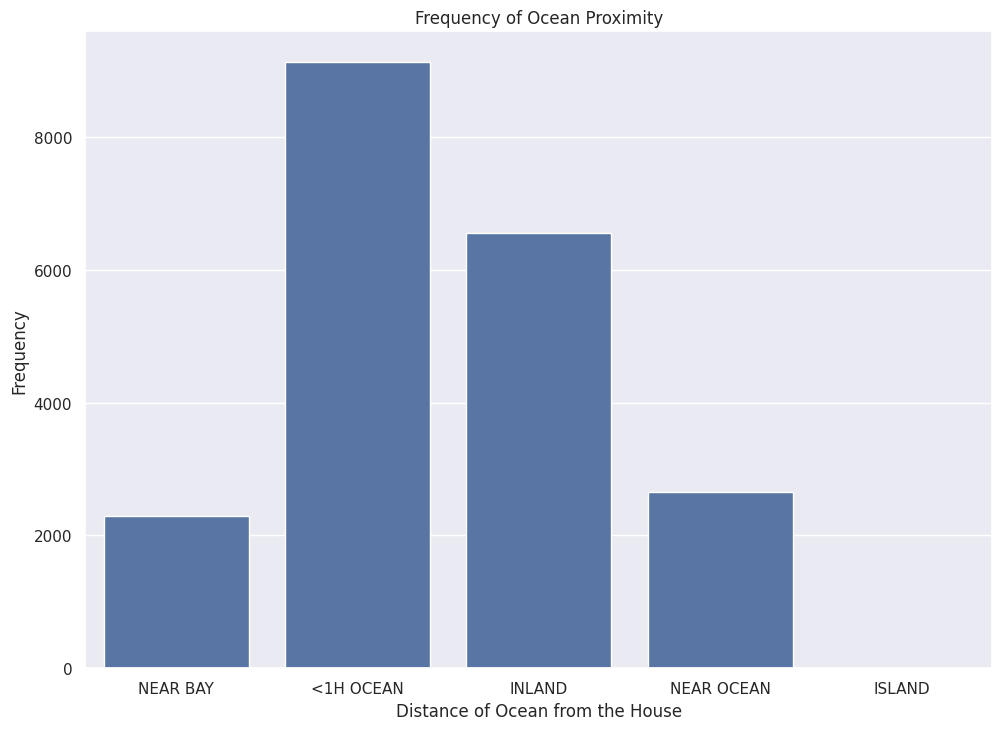

In [142]:
# Frequency of Ocean Proximity
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Plot
sns.countplot(data=california_df, x="ocean_proximity").set(
    title = "Frequency of Ocean Proximity",
    xlabel = "Distance of Ocean from the House",
    ylabel = "Frequency"
)

# Show
plt.show()

In [143]:
for col in california_df.columns:
    print("\n\n==============================")
    print("COLUMN:", col)
    print("==============================")

    # Check type
    if pd.api.types.is_numeric_dtype(california_df[col]):
        print("Type: Numeric")
        print("Missing values:", california_df[col].isnull().sum())
        print("Mean:", california_df[col].mean())
        print("Median:", california_df[col].median())
        print("Std:", california_df[col].std())
        print("Skew:", california_df[col].skew())



COLUMN: longitude
Type: Numeric
Missing values: 0
Mean: -119.56970445736432
Median: -118.49
Std: 2.003531723502581
Skew: -0.2978012079524362


COLUMN: latitude
Type: Numeric
Missing values: 0
Mean: 35.63186143410853
Median: 34.26
Std: 2.1359523974571117
Skew: 0.46595300370997006


COLUMN: housing_median_age
Type: Numeric
Missing values: 0
Mean: 28.639486434108527
Median: 29.0
Std: 12.585557612111637
Skew: 0.060330637599136865


COLUMN: total_rooms
Type: Numeric
Missing values: 0
Mean: 2635.7630813953488
Median: 2127.0
Std: 2181.615251582787
Skew: 4.147343450632158


COLUMN: total_bedrooms
Type: Numeric
Missing values: 0
Mean: 537.8705525375617
Median: 438.0
Std: 419.26659232552385
Skew: 3.4770233756335105


COLUMN: population
Type: Numeric
Missing values: 0
Mean: 1425.4767441860465
Median: 1166.0
Std: 1132.4621217653375
Skew: 4.93585822672712


COLUMN: households
Type: Numeric
Missing values: 0
Mean: 499.5396802325581
Median: 409.0
Std: 382.3297528316099
Skew: 3.410437711667147


COL

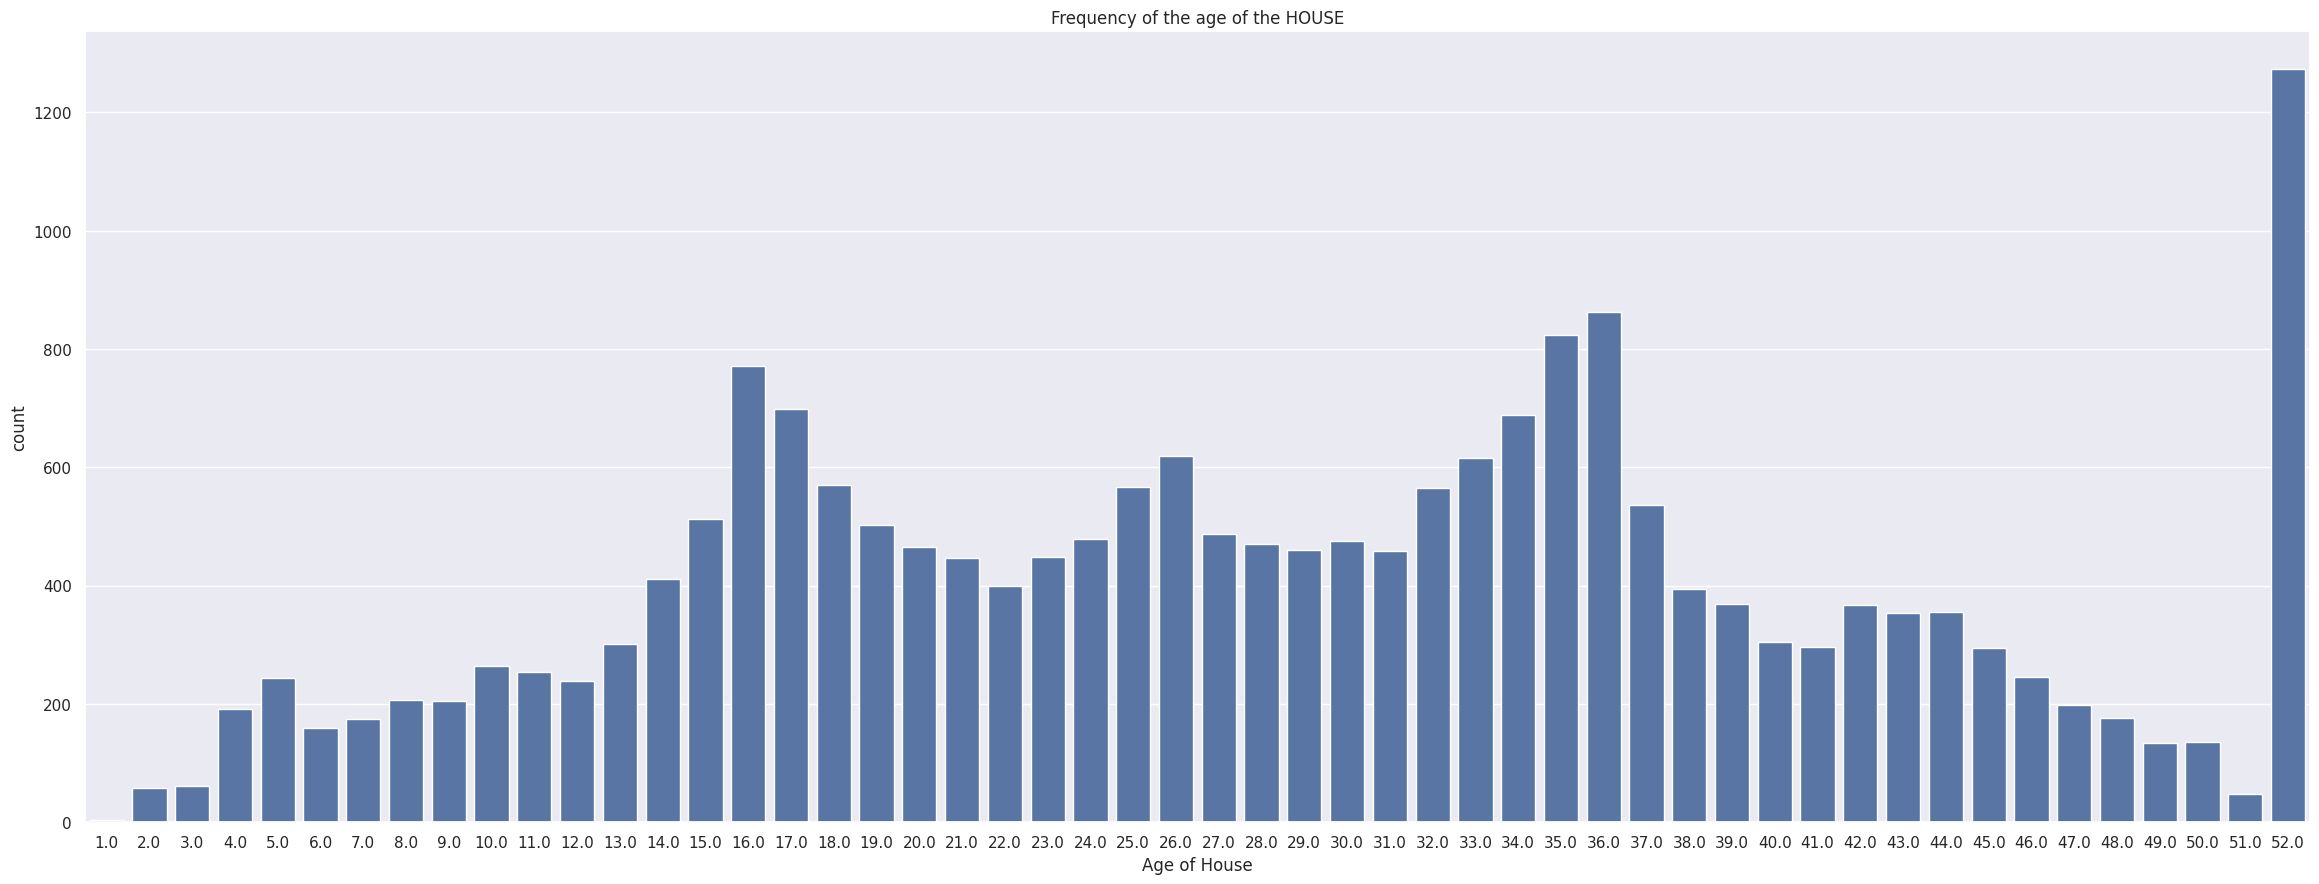

In [144]:
# Frequency of the age of the HOUSE
sns.set(rc={'figure.figsize':(28.7,10.27)})

# Plot
sns.countplot(data=california_df, x="housing_median_age").set(
    title = "Frequency of the age of the HOUSE",
    xlabel = "Age of House"
)

# Show
plt.show()

In [145]:
print("\n===== CATEGORICAL SUMMARY =====\n")

categorical_cols = california_df.select_dtypes(exclude=[np.number]).columns.tolist()

for col in categorical_cols:
    print(f"\n### {col} ###\n")
    print(california_df[col].value_counts(dropna=False))



===== CATEGORICAL SUMMARY =====


### ocean_proximity ###

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


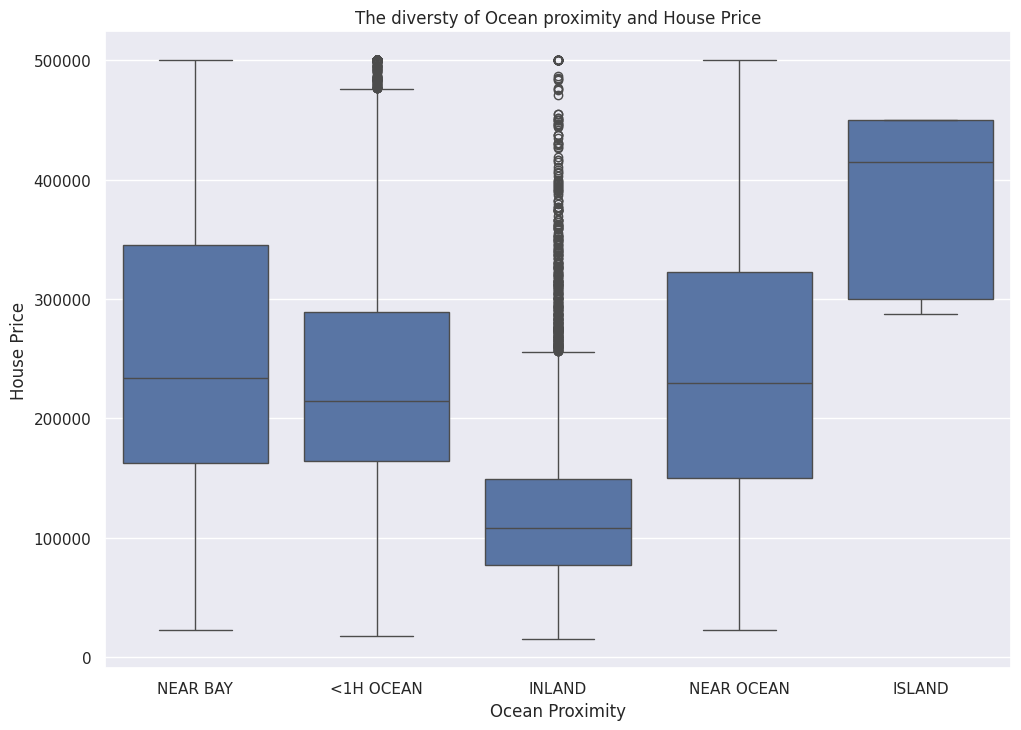

In [146]:
# The diversty of Ocean proximity and House Price
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.boxplot(x='ocean_proximity',y='median_house_value',data=california_df).set(
    title = "The diversty of Ocean proximity and House Price",
    xlabel = "Ocean Proximity",
    ylabel = "House Price"
)

# Show
plt.show()



### ocean_proximity ###


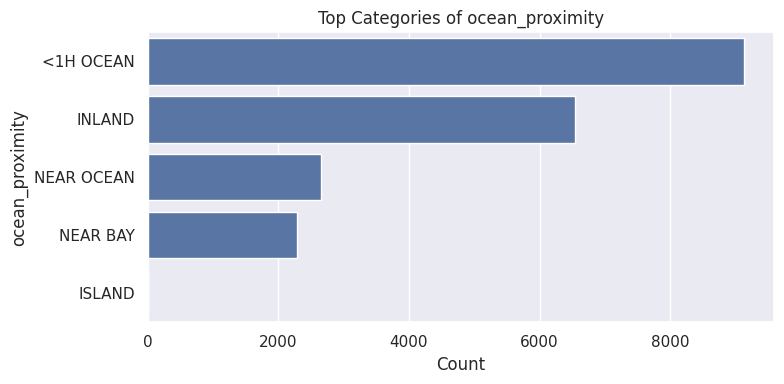

In [147]:
for col in categorical_cols:
    print(f"\n\n### {col} ###")
    vc = california_df[col].value_counts().head(20)

    plt.figure(figsize=(8,4))
    sns.barplot(x=vc.values, y=vc.index)
    plt.title(f"Top Categories of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


##BI VARIATE ANALYSIS

In [148]:
numeric_cols = california_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = california_df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


Numeric columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
Categorical columns: ['ocean_proximity']


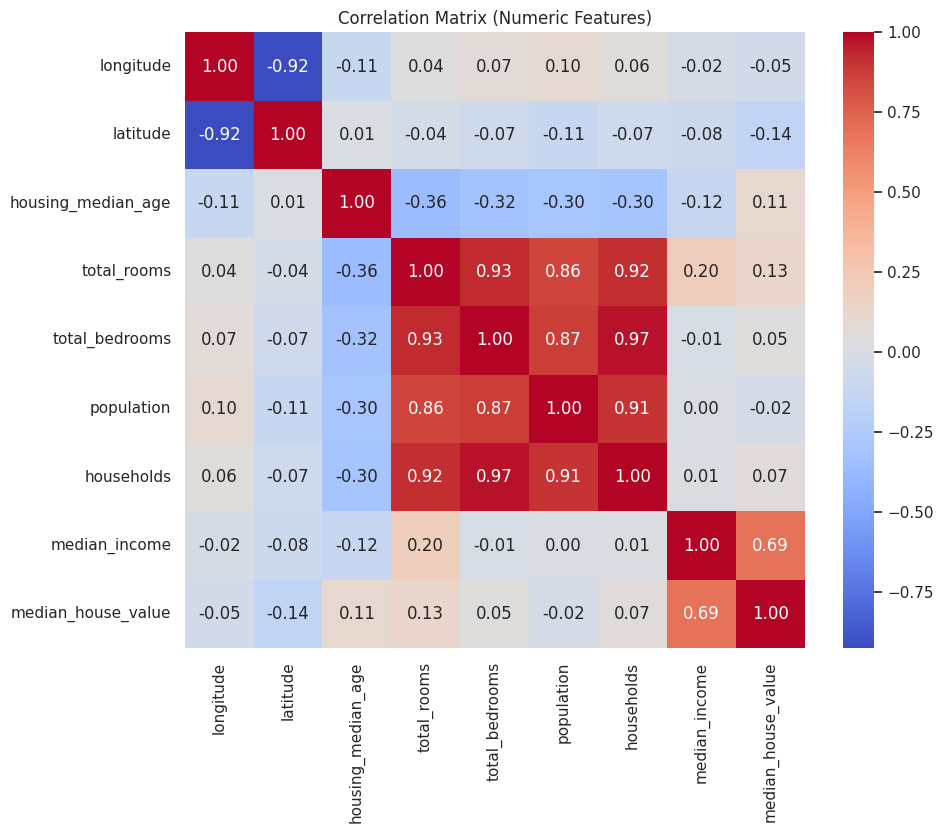

In [149]:
plt.figure(figsize=(10,8))
sns.heatmap(california_df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

total_bedrooms  households        0.974725
total_rooms     total_bedrooms    0.927253
longitude       latitude          0.924664
total_rooms     households        0.918484
population      households        0.907222
dtype: float64


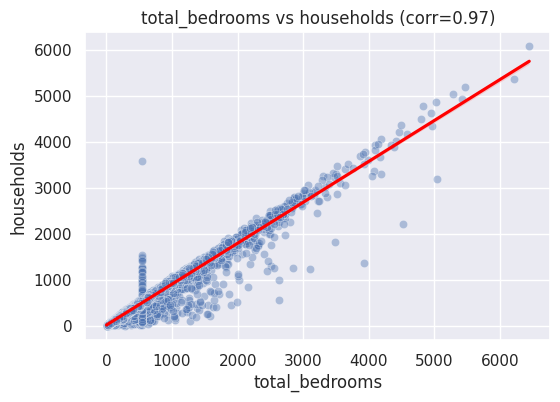

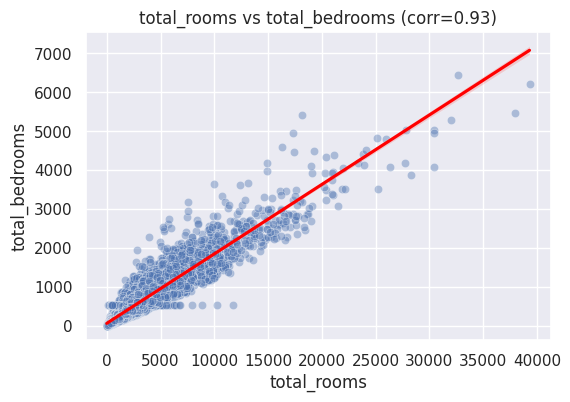

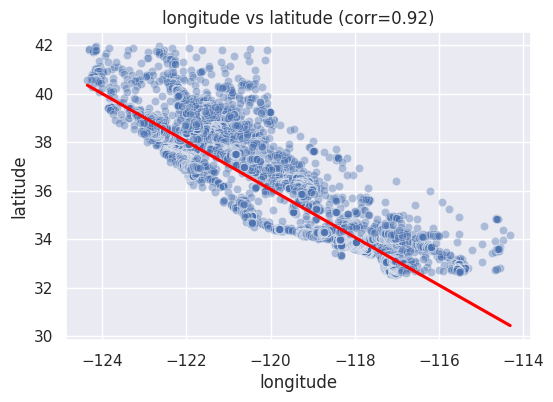

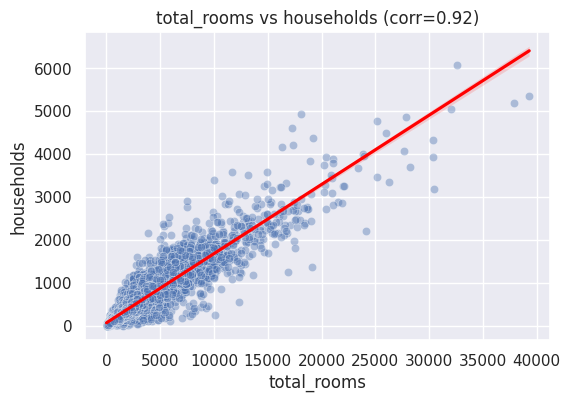

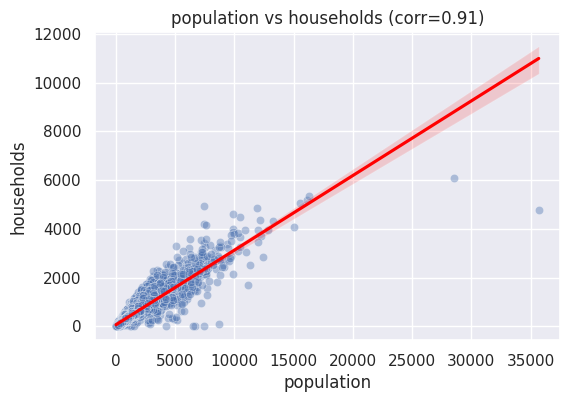

In [150]:
corr = california_df[numeric_cols].corr().abs()

# get top 5 correlated pairs
pairs = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
    .head(5)
)

print(pairs)

for (col1, col2), val in pairs.items():
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=california_df[col1], y=california_df[col2], alpha=0.4)
    sns.regplot(x=california_df[col1], y=california_df[col2], scatter=False, color='red')
    plt.title(f"{col1} vs {col2} (corr={val:.2f})")
    plt.show()


<Figure size 2500x1500 with 0 Axes>

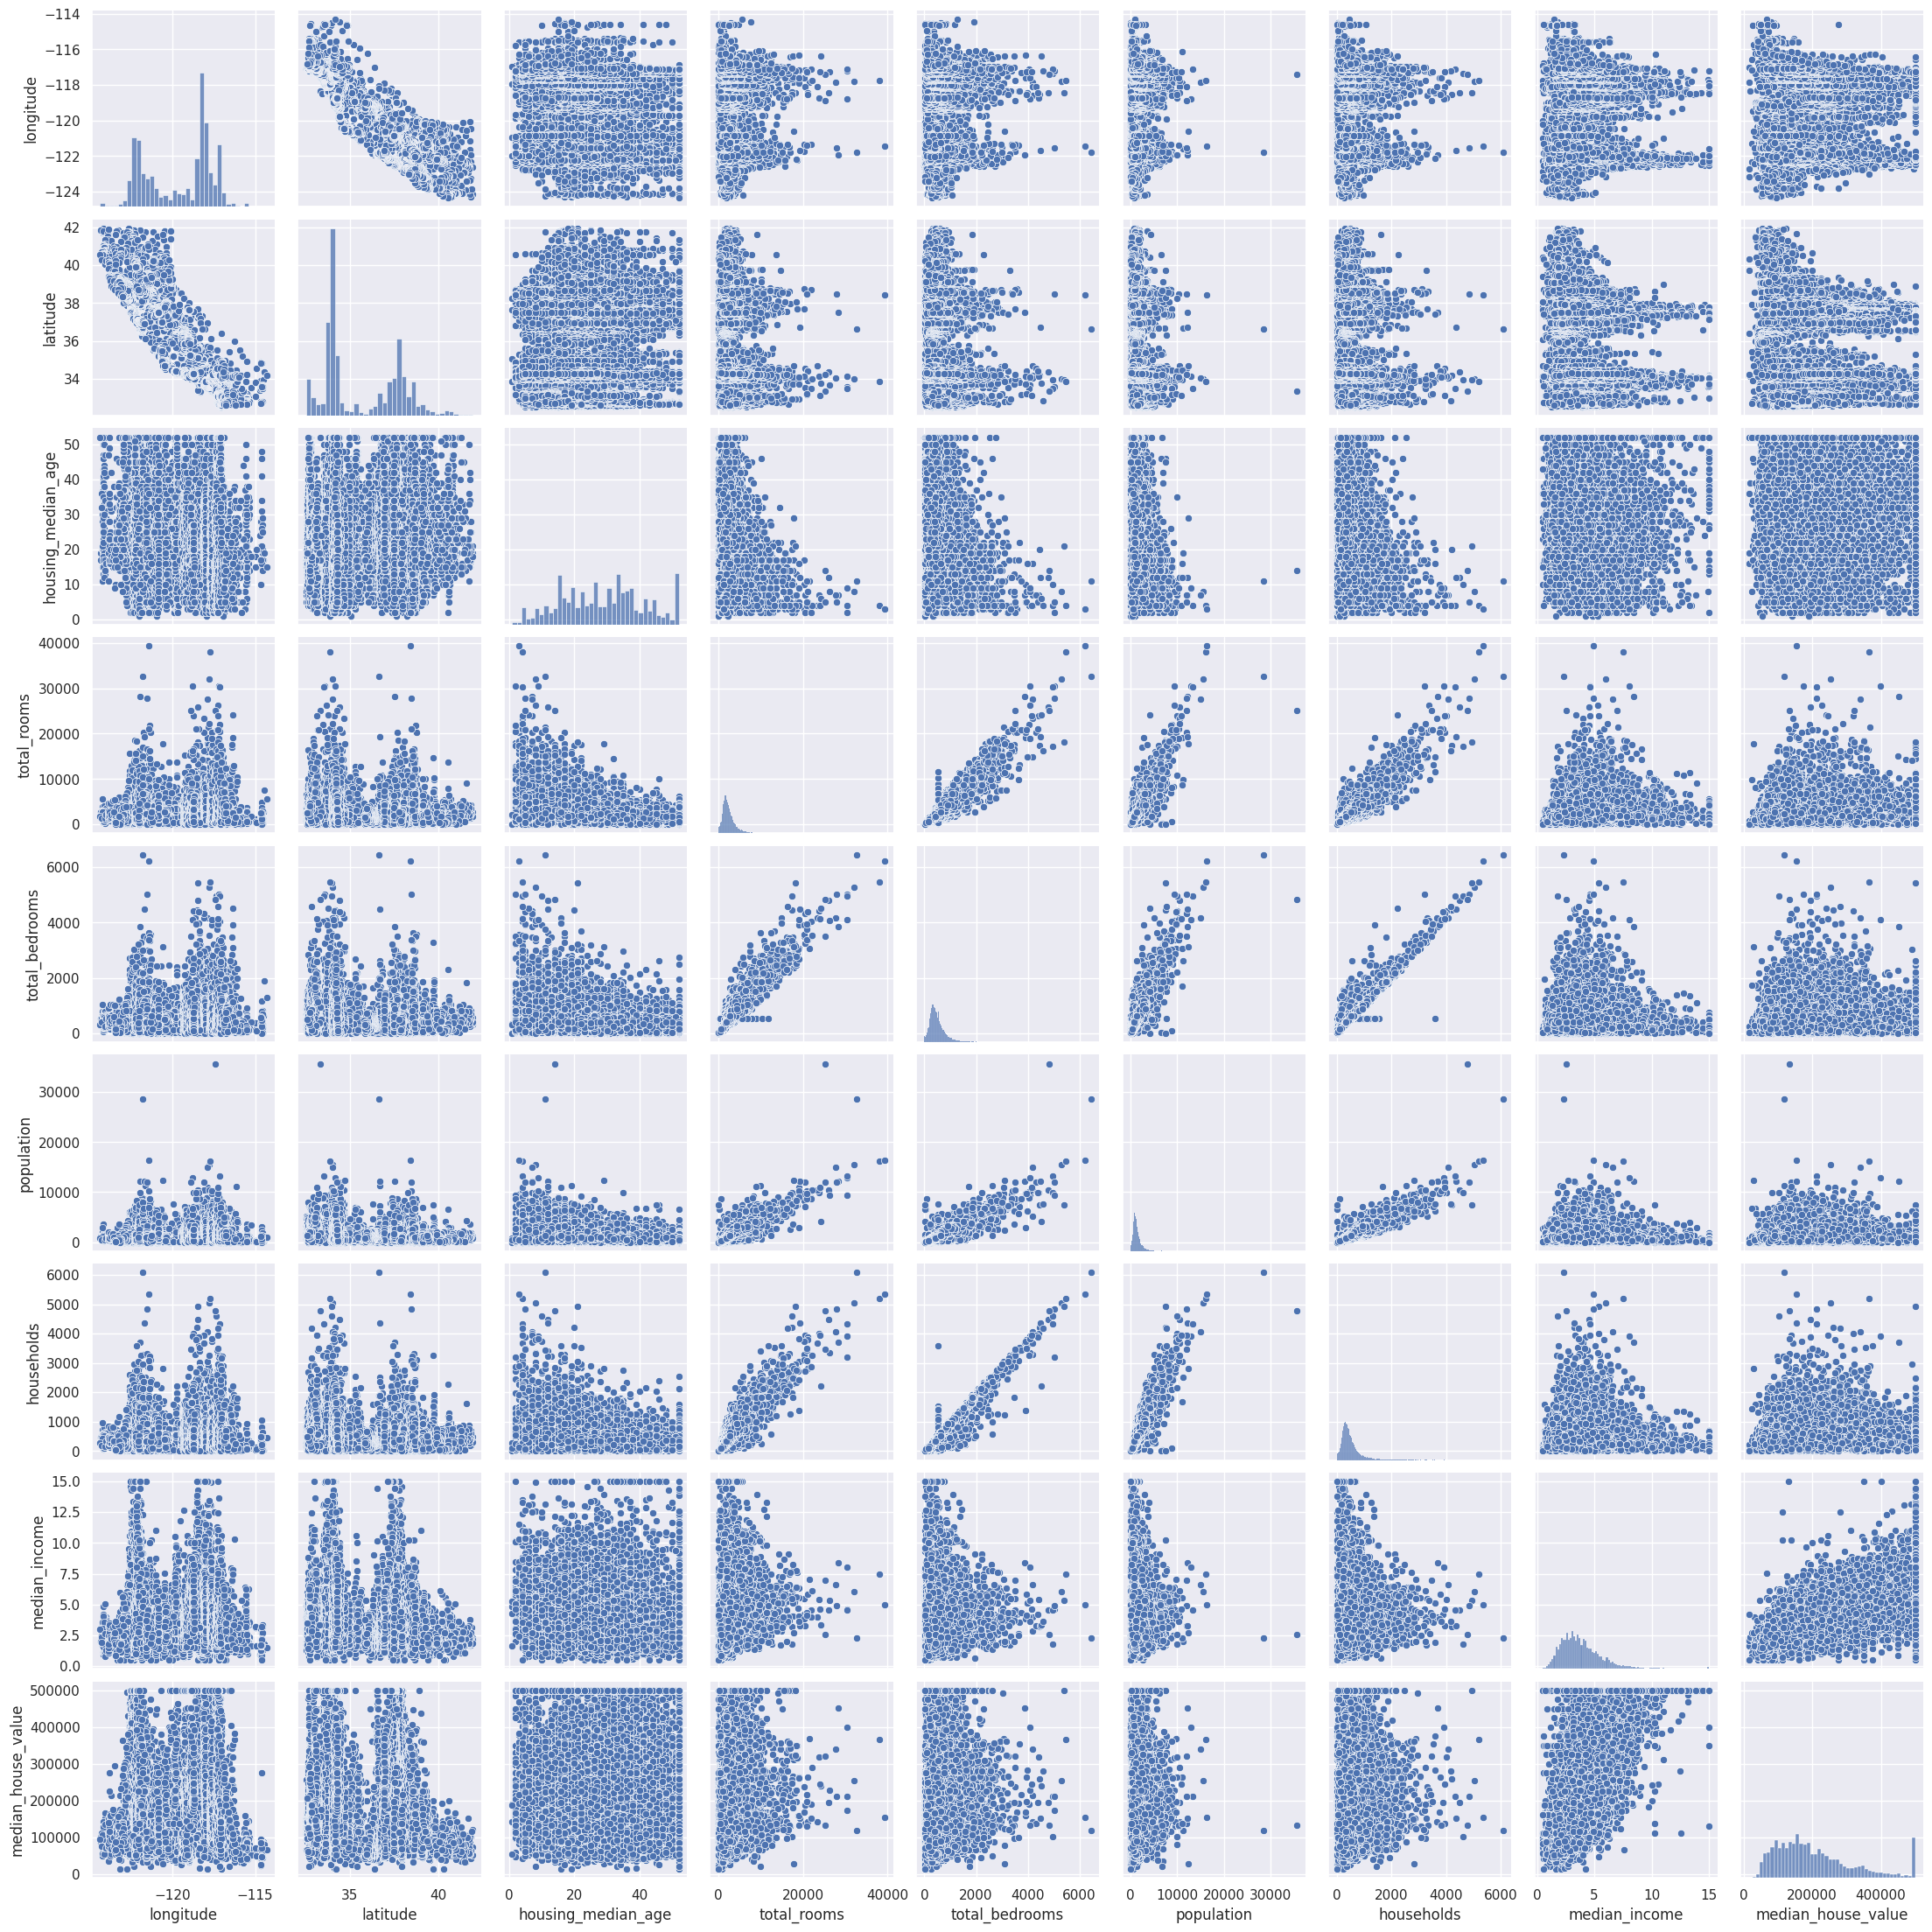

In [151]:
# Get pair values
plt.figure(figsize=(25,15))

# Plot
sns.pairplot(california_df)

# Sho
plt.show()

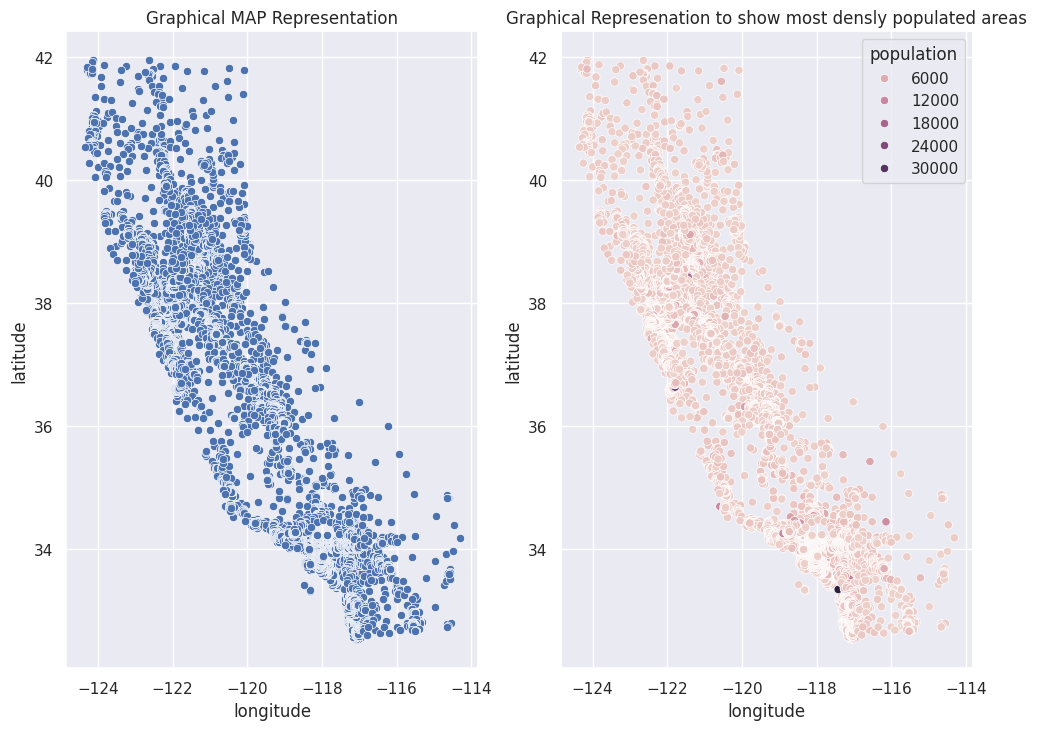

In [152]:
# Get the longitudinal & latitudinal graph
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, axes = plt.subplots(1, 2)

# Plot
sns.scatterplot(data=california_df, x="longitude", y="latitude", ax=axes[0]).set(
    title = "Graphical MAP Representation"
)
sns.scatterplot(data=california_df, x="longitude", y="latitude", hue="population", ax=axes[1]).set(
    title = "Graphical Represenation to show most densly populated areas"
)

# Show
plt.show()

# |||ANALYSIS|||
# We obeserve that the mostly densly populated areas are near San Diago & Los Angelos and San Fransisco. Very little population near and Las Vegas. City of Redding is also sparsely populated.

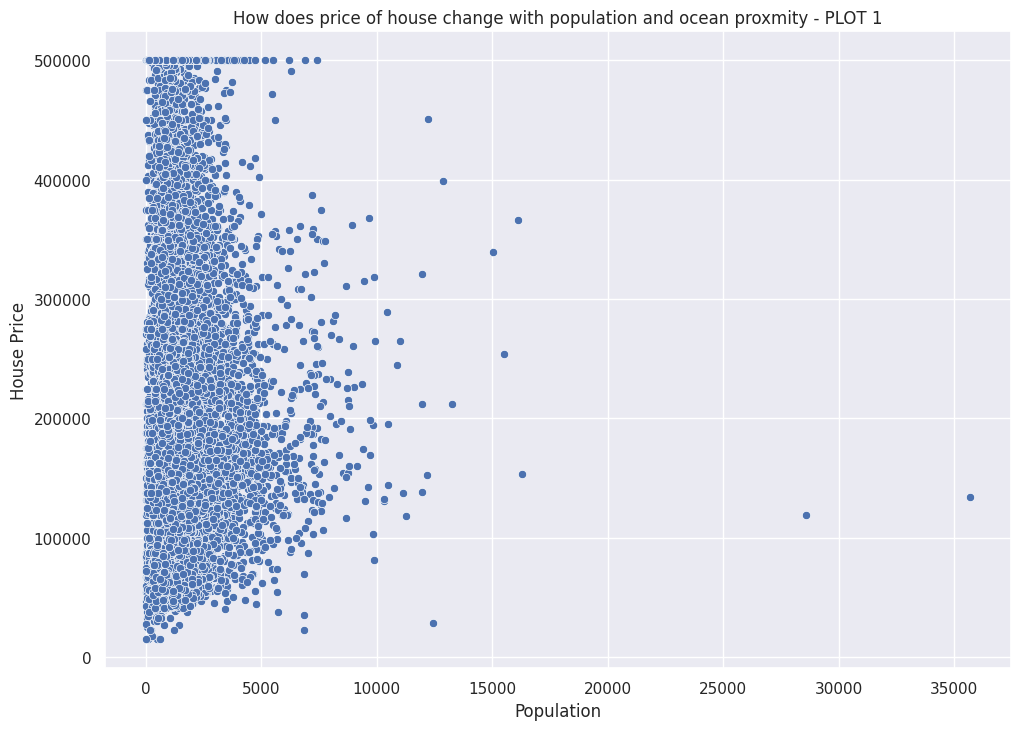

In [153]:
# The relation between the Ocean Proximity and Population - PLOT 1
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Plot
sns.scatterplot(data=california_df, x="population", y="median_house_value").set(
    title = "How does price of house change with population and ocean proxmity - PLOT 1",
    xlabel = "Population",
    ylabel = "House Price"
)
# Show
plt.show()

# |||ANALYSIS|||
# We obeserve that most of the houses are Inland, with a price between 30,000 to 160,000. Most of the near bay and <1H Ocean as well as Near Ocean are around 300,000-500,000. Island seems to be in every price range.

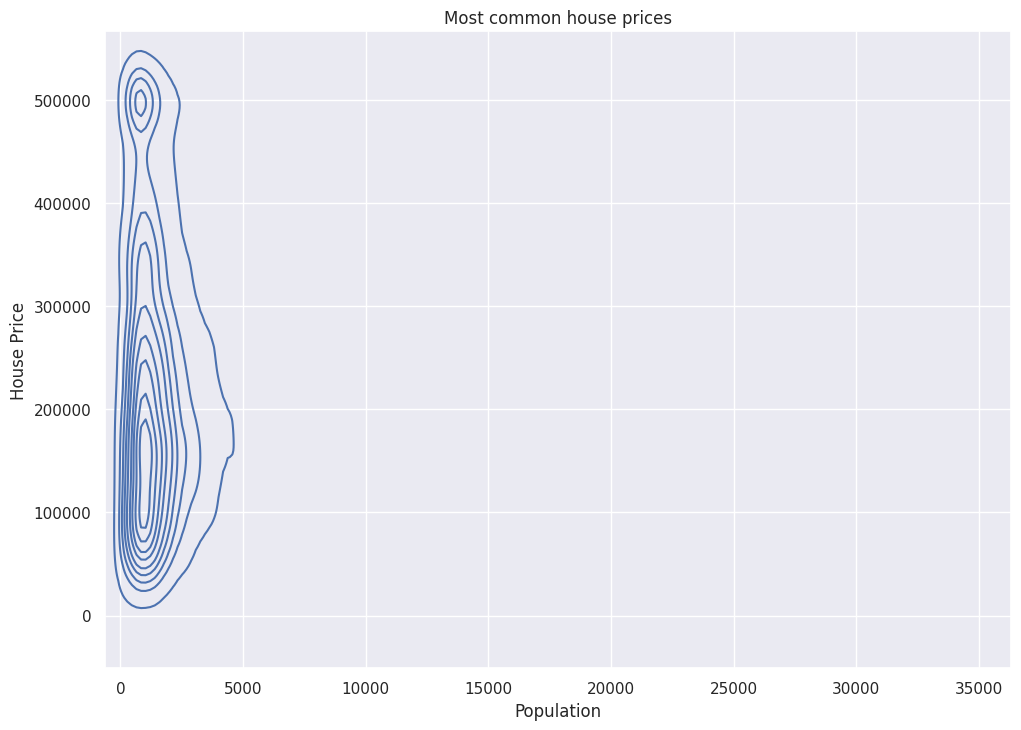

In [154]:
# The most common house prices
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Plot
sns.kdeplot(x='population', y='median_house_value', data=california_df).set(
    title = "Most common house prices",
    xlabel = "Population",
    ylabel = "House Price"
)

# Show
plt.show()

# |||ANALYSIS|||
# We observe that mostly house prices in CA, lie between 50,000-280,000.

##MULTI VARIATE ANALYSIS

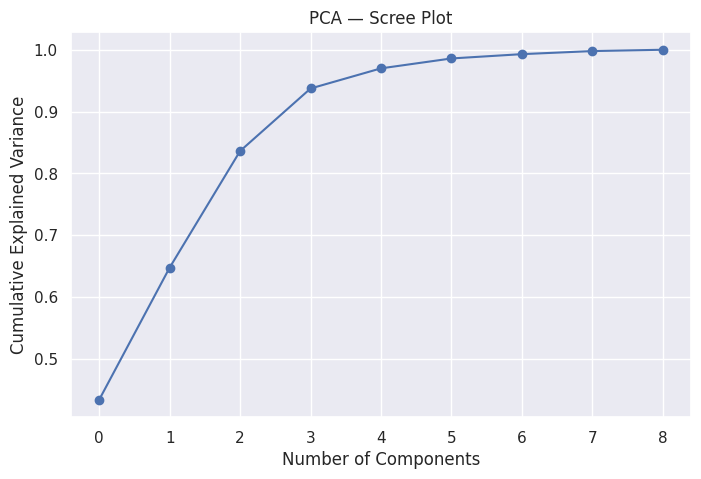

In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize numeric features
X_scaled = StandardScaler().fit_transform(california_df[numeric_cols].fillna(california_df[numeric_cols].median()))

# PCA
pca = PCA()
pca.fit(X_scaled)

# Explained variance plot (scree)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA — Scree Plot")
plt.grid(True)
plt.show()



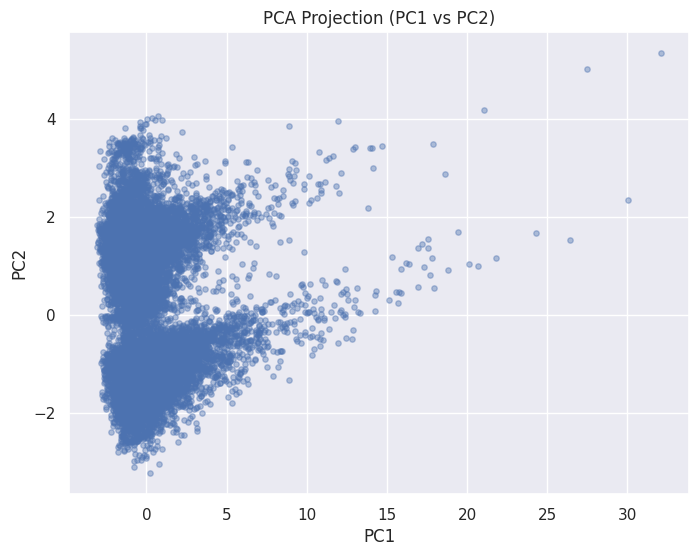

In [156]:
X_pca = pca.transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    alpha=0.4,
    s=15
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection (PC1 vs PC2)")
plt.grid(True)
plt.show()

##SIMPLE LINEAR REGRESSION

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [158]:
df = pd.read_csv("housing[1].csv")

In [159]:
X = df[["median_income"]]        # independent variable
y = df["median_house_value"]

In [160]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [161]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [162]:
y_pred = model.predict(X_test)

In [163]:
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Coefficient: 41933.84939381272
Intercept: 44459.72916907875
MAE: 62990.86530093761
R²: 0.45885918903846656


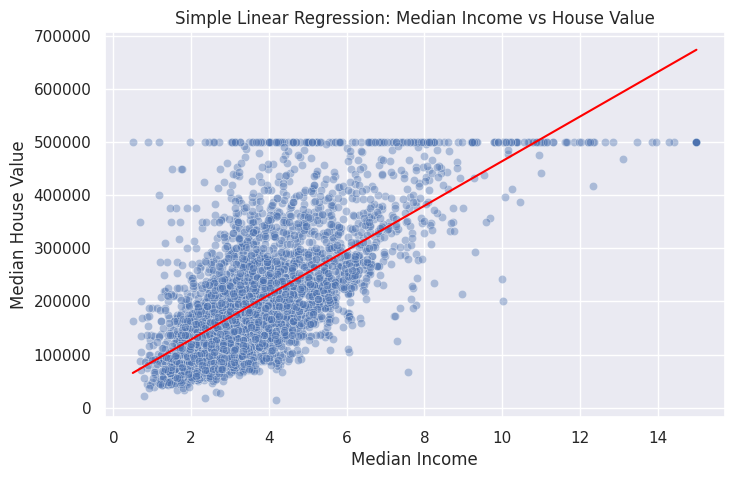

In [164]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test["median_income"], y=y_test, alpha=0.4)
sns.lineplot(x=X_test["median_income"], y=y_pred, color='red')
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Simple Linear Regression: Median Income vs House Value")
plt.show()

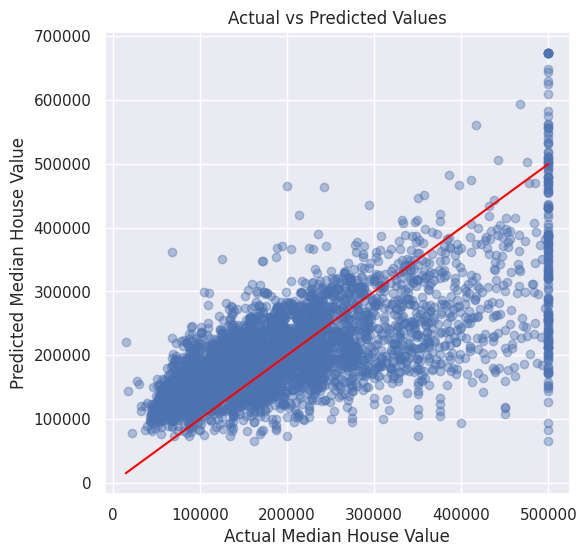

In [165]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Values")
plt.show()


##MULTIPLE LINEAR REGRESSION

In [166]:
from sklearn.impute import SimpleImputer


In [167]:
numeric_df = df.select_dtypes(include=['number'])


In [168]:
# Set the target variable
target = "median_house_value"        # your dataset's target

In [169]:

# Define X and y
X = numeric_df.drop(columns=[target])   # all numeric features except target
y = numeric_df[target]

In [170]:
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42
)

In [172]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [173]:
y_pred = model.predict(X_test)

In [174]:
print("Intercept:", model.intercept_)
print("\n=== MODEL PERFORMANCE ===")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Intercept: -3578224.234818384

=== MODEL PERFORMANCE ===
MAE: 51810.483628046866
R²: 0.6138664756435175


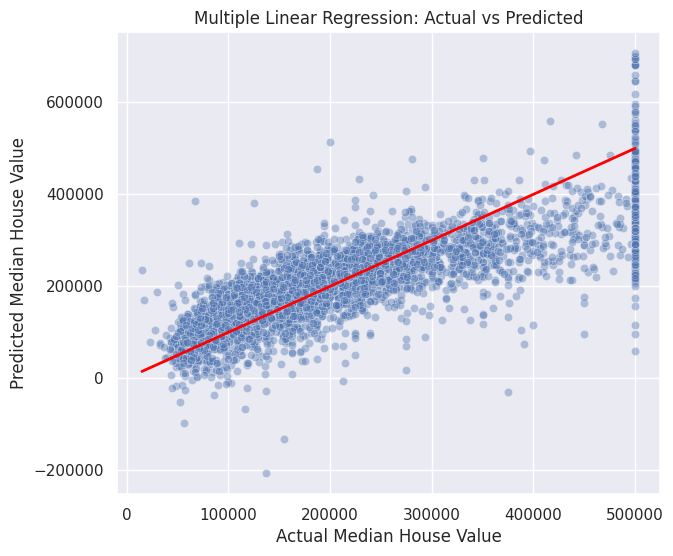

In [175]:
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2)

plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.show()